In [12]:
import cv2
import mediapipe as mp
import holosense_libconfigs
from holosense import SpatialTracker
import numpy as np
import math
import latexify
import matplotlib.pyplot as plt
spatial_tracker = SpatialTracker(single_output=False)



mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)


LEFT_IRIS = [474,475, 476, 477]
RIGHT_IRIS = [469, 470, 471, 472]
FIXED_POINTS_LIST = [446,226,19]
print("setup complete")

setup complete


I0000 00:00:1720832607.170078  312470 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1720832607.171080  316996 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.0-1pop0~1706872735~22.04~0fa430c), renderer: Mesa Intel(R) Graphics (ADL GT2)


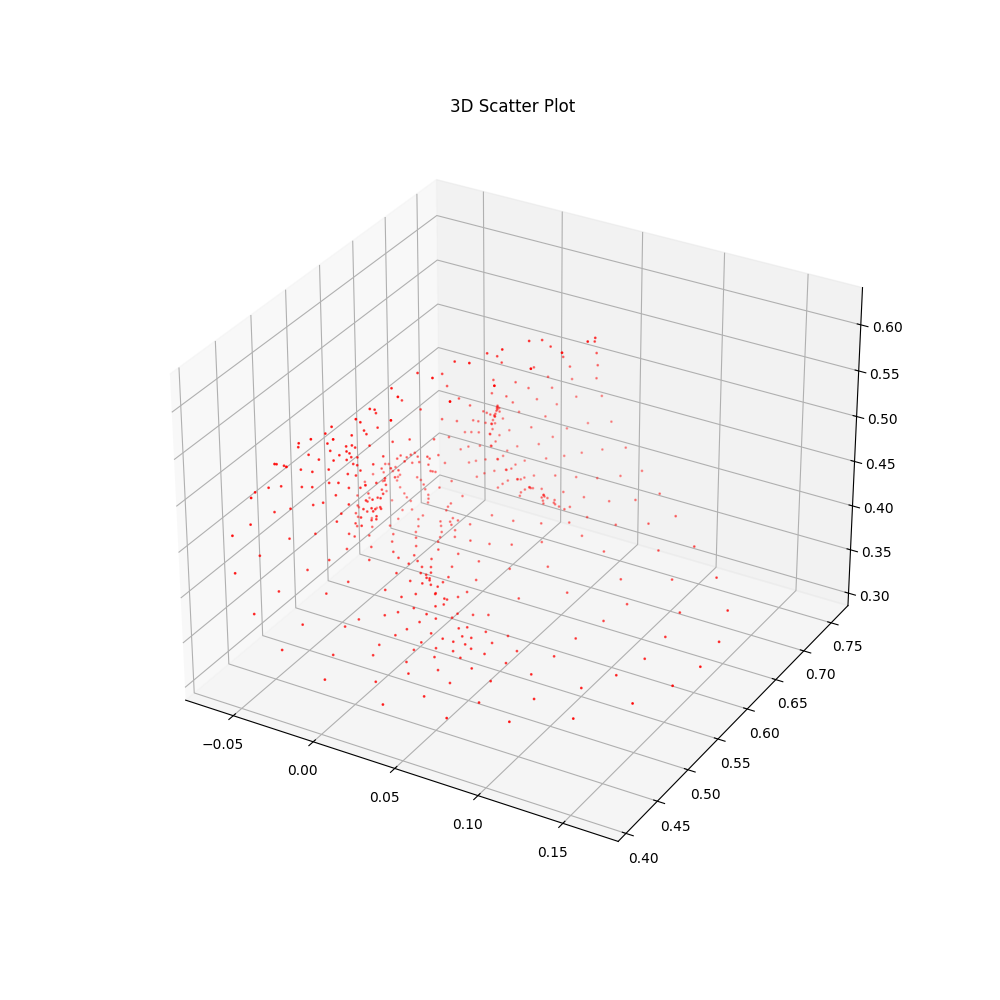

[[ 0.59341693  0.54343212  0.01241475  1.        ]
 [ 0.32417187  0.52239943  0.05125415  1.        ]
 [ 0.38600603  0.64004093 -0.04868305  1.        ]]
[[-0.45858479 -0.21621338 13.09414387  1.        ]
 [ 3.57555366 -0.25622079 14.27840328  1.        ]
 [ 1.90853715 -1.31885254 11.75556278  1.        ]]
[-0.57729814 -0.78628937  0.22017239  0.        ]
[ 0.60799993 -0.73989205 -0.28791638  0.        ]


In [30]:
%matplotlib widget
frame = cv2.imread("Lena.png")

frame = cv2.flip(frame, 1)
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img_h, img_w = frame.shape[:2]
results = face_mesh.process(rgb_frame)
if results.multi_face_landmarks:
    holosense_coords = np.array(spatial_tracker.calculatePosition(results.multi_face_landmarks[0]))

    # visualizer
    xcoords = np.array([p.x for p in results.multi_face_landmarks[0].landmark])
    ycoords = np.array([p.y for p in results.multi_face_landmarks[0].landmark])
    zcoords = np.array([p.z for p in results.multi_face_landmarks[0].landmark])

    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    ax.grid()

    ax.scatter(zcoords, ycoords, xcoords, c = 'r', s = 1)
    ax.set_title('3D Scatter Plot')
    plt.show()
    # math
    mesh_points=np.array([[p.x, p.y, p.z, 1] for p in results.multi_face_landmarks[0].landmark])
    HS_vectors = np.array([[p[0], p[1], p[2], 1] for p in holosense_coords])
    HS_points = np.array((mesh_points[447], mesh_points[226], mesh_points[19]))
    amp = np.sum(mesh_points, axis=0)/len(mesh_points)
    print(HS_points)
    print(HS_vectors)
    lefteye_location = np.sum(mesh_points[LEFT_IRIS], axis=0)/4
    righteye_location = np.sum(mesh_points[RIGHT_IRIS], axis=0)/4

    le_vec = (lefteye_location - amp)
    le_vec /= np.linalg.norm(le_vec)
    re_vec = righteye_location - amp
    re_vec /= np.linalg.norm(re_vec)
    print(re_vec)
    print(le_vec)






In [22]:
X = mesh_points
#Z = prev_points

#Transform = np.linalg.pinv(np.linalg.pinv(Z).dot(X))
Transform = np.linalg.pinv(np.linalg.pinv(HS_vectors).dot(HS_points))



print(Transform.shape)
print(Transform)

(4, 4)
[[-13.89176821   1.3207239   -1.63451765   0.02183092]
 [ -1.35280057  -5.3663897   -7.63715056   0.21021788]
 [  6.44332514   5.11826037  15.20474008   0.26207977]
 [  8.44701615   1.85751034  17.98102075   0.86965666]]


In [162]:
import copy

prev_points = copy.deepcopy(mesh_points)

In [23]:
transformed = []
for i in X:
    i.shape = (1,4)
    transformed.append((i.dot(Transform)).reshape(4,))
    

In [24]:
for i in range(len(transformed)):
    #print(Z[i] - transformed[i])

NameError: name 'Z' is not defined

In [25]:
print(len(transformed))

478


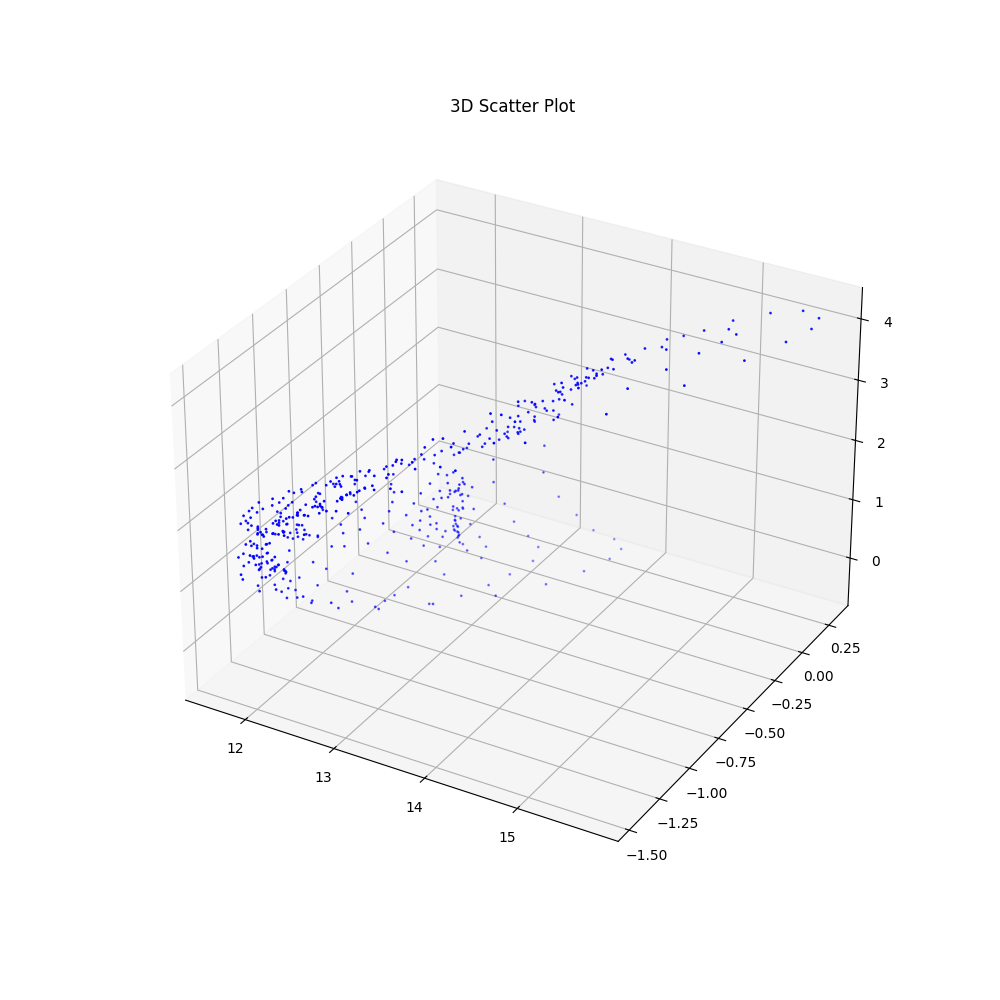

In [28]:
%matplotlib widget 

#xcoords = np.array([p[0] for p in Z])
#ycoords = np.array([p[1] for p in Z])
#zcoords = np.array([p[2] for p in Z])

xcoords1 = np.array([p[0] for p in transformed])
ycoords1 = np.array([p[1] for p in transformed])
zcoords1 = np.array([p[2] for p in transformed])    

xcoords2 = np.array([p[0] for p in X])
ycoords2 = np.array([p[1] for p in X])
zcoords2 = np.array([p[2] for p in X])    

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

#ax.scatter(zcoords, ycoords, xcoords, c = 'r', s = 1)
ax.scatter(zcoords1, ycoords1, xcoords1, c = 'b', s = 1)
#ax.scatter(zcoords2, ycoords2, xcoords2, c = 'g', s = 1)

ax.set_title('3D Scatter Plot')
plt.show()


In [205]:
averageZ = np.sum(Z, axis=0)/len(Z)
averageY = np.sum(transformed, axis=0)/len(transformed)

In [207]:
print(averageZ)
print(averageY)

[ 5.25726746e-01  5.64618755e-01 -4.76788120e-05  1.00000000e+00]
[ 5.25726746e-01  5.64618755e-01 -4.76788120e-05  1.00000000e+00]


In [209]:
lefteye_location_Bala = np.sum(Z[LEFT_IRIS], axis=0)/4
righteye_location_Bala = np.sum(Z[RIGHT_IRIS], axis=0)/4

lefteye_location_Lena = np.sum(np.array(transformed)[LEFT_IRIS], axis=0)/4
righteye_location_Lena = np.sum(np.array(transformed)[RIGHT_IRIS], axis=0)/4



In [214]:
print(lefteye_location_Bala - lefteye_location_Lena)
print(righteye_location_Bala - righteye_location_Lena)
print(averageY-averageZ)

[-3.22498975e-04  5.63833221e-03  1.61529504e-03  1.77635684e-15]
[ 6.71994201e-03 -4.75461312e-03  3.93653371e-03  1.99840144e-15]
[-1.22124533e-15 -4.55191440e-15  1.14274909e-16 -2.22044605e-16]
